<a href="https://colab.research.google.com/github/Nanda-0101/portofolio_aja/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("gojek.csv", on_bad_lines='skip')
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,001fbdcd-0bae-49eb-b2d4-05e78eed6dd8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aku sudah 3th pakai gojek karena drivernya ram...,5.0,0.0,5.19.2,2025-05-27 11:06:17,NaN,NaN,5.19.2
1,4c7ec9fa-4005-461d-b48f-97d0595145c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,daftar meñjadi driver gojek-Go Partner seperti...,2.0,0.0,4.36.1,2025-05-27 11:02:15,"Hai Kak Ray, mohon maaf untuk kendalanya. Lapo...",2025-05-27 14:14:03,4.36.1
2,4c46cabb-93e2-4102-9911-854bdfe074da,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"baguss, murah² juga harganya",5.0,0.0,5.19.2,2025-05-27 10:58:23,NaN,NaN,5.19.2
3,bcba130f-f286-418d-9123-f20f7637831a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,menyenangkan,5.0,0.0,5.19.2,2025-05-27 10:57:03,NaN,NaN,5.19.2
4,4a4b714e-be8a-4450-bb6f-2ebbd230511c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap sesuai dgn tujuan,5.0,0.0,5.19.2,2025-05-27 10:47:32,NaN,NaN,5.19.2
...,...,...,...,...,...,...,...,...,...,...,...
47625,5fbcfa3d-d7c0-44ca-aad7-726656b5b792,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Selalu pesanan saya di batalkan oleh driver se...,2.0,0.0,4.93.1,2024-09-18 09:16:02,"Hai Kak Anggie, mohon maaf atas ketidaknyamana...",2024-09-18 09:41:23,4.93.1
47626,4cb1fe67-5c23-4b6d-92bb-2205ab2635c1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi yang sangat bermanfaat,5.0,0.0,NaN,2024-09-18 09:00:49,NaN,NaN,NaN
47627,5203c24c-7b76-4c8b-9f63-c7c35b585e53,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ok,5.0,0.0,4.93.1,2024-09-18 08:42:37,NaN,NaN,4.93.1
47628,695e5cf9-43e4-4381-a4b5-a015dd739f69,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sekarng banyak driver alay. Udah nunggu 1 jam ...,3.0,0.0,4.93.1,2024-09-18 08:37:58,"Hai Kak Ridwan, mohon maaf atas ketidaknyamana...",2024-09-18 09:04:41,4.93.1


In [ ]:
df.shape

(47630, 11)

In [ ]:
df.dtypes

,0
reviewId,object
userName,object
userImage,object
content,object
score,float64
thumbsUpCount,float64
reviewCreatedVersion,object
at,object
replyContent,object
repliedAt,object


In [ ]:
# Cek jumlah nilai unik dan missing
print(df.nunique())
print(df.isnull().sum())

reviewId                47630
userName                    1
userImage                   1
content                 33532
score                       5
thumbsUpCount             147
reviewCreatedVersion      228
at                      47566
replyContent            13388
repliedAt               14212
appVersion                228
dtype: int64
reviewId                    0
userName                    1
userImage                   1
content                     1
score                       1
thumbsUpCount               1
reviewCreatedVersion    10768
at                          1
replyContent            33418
repliedAt               33418
appVersion              10768
dtype: int64


In [ ]:
# Statistik deskriptif numerik
print(df.describe())


              score  thumbsUpCount
count  47629.000000   47629.000000
mean       3.764786       0.995423
std        1.734243      22.413220
min        1.000000       0.000000
25%        1.000000       0.000000
50%        5.000000       0.000000
75%        5.000000       0.000000
max        5.000000    2922.000000


In [ ]:
# Statistik untuk kolom kategorikal
print(df['score'].value_counts())



score
5.0    29817
1.0    11916
4.0     2398
2.0     1774
3.0     1724
Name: count, dtype: int64


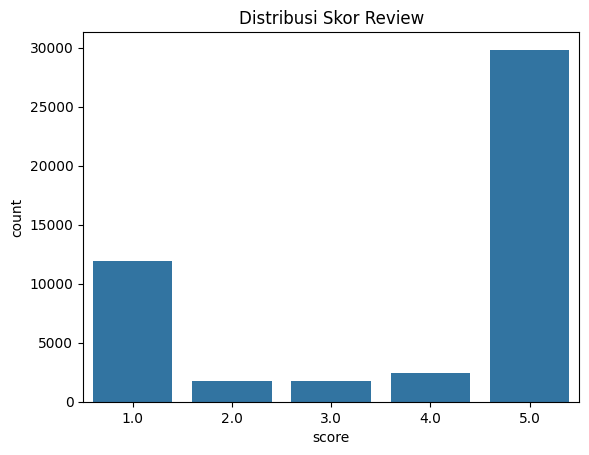

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='score')
plt.title("Distribusi Skor Review")
plt.show()


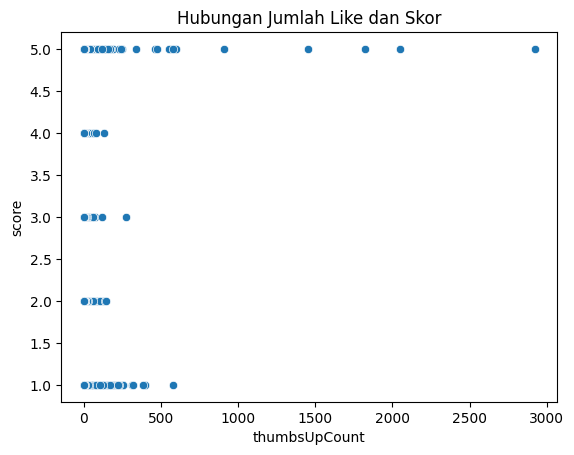

In [ ]:
sns.scatterplot(data=df, x='thumbsUpCount', y='score')
plt.title("Hubungan Jumlah Like dan Skor")
plt.show()


In [ ]:
missing = df.isnull().sum()
print("Missing values tiap kolom:\n", missing[missing > 0])


Missing values tiap kolom:
 userName                    1
userImage                   1
content                     1
score                       1
thumbsUpCount               1
reviewCreatedVersion    10768
at                          1
replyContent            33418
repliedAt               33418
appVersion              10768
dtype: int64


In [ ]:
# Hapus baris yang tidak punya konten ulasan
df = df.dropna(subset=['content'])


In [ ]:
df = df.drop(columns=['userImage', 'userName', 'reviewId'])


In [ ]:
df = df.drop_duplicates()


In [ ]:
def label_sentiment(score):
    if score == 5:
        return "sangat baik"
    elif score == 4:
        return "baik"
    elif score == 3:
        return "netral"
    elif score == 2:
        return "buruk"
    elif score == 1:
        return "sangat buruk"
    else:
        return "tidak diketahui"

# Terapkan ke dataframe
df['sentiment'] = df['score'].apply(label_sentiment)

# Hitung jumlah masing-masing kategori
print(df['sentiment'].value_counts())


sentiment
sangat baik     29817
sangat buruk    11916
baik             2398
buruk            1774
netral           1724
Name: count, dtype: int64


In [ ]:
import re
df['content'] = df['content'].astype(str).apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Hapus tanda baca
df['content'] = df['content'].str.lower()  # Ubah jadi lowercase


In [ ]:
df['at'] = pd.to_datetime(df['at'])
df['repliedAt'] = pd.to_datetime(df['repliedAt'])


In [ ]:
df['sentiment'].value_counts(normalize=True) * 100


,proportion
sentiment,
sangat baik,62.602616
sangat buruk,25.018371
baik,5.034748
buruk,3.724622
netral,3.619643


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['content'].astype(str))
y = df['sentiment']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y_encoded)


In [ ]:
import numpy as np
from collections import Counter

print("Sebelum SMOTE:", Counter(y_encoded))
print("Setelah SMOTE:", Counter(y_res))


Sebelum SMOTE: Counter({np.int64(3): 29817, np.int64(4): 11916, np.int64(0): 2398, np.int64(1): 1774, np.int64(2): 1724})
Setelah SMOTE: Counter({np.int64(3): 29817, np.int64(1): 29817, np.int64(2): 29817, np.int64(4): 29817, np.int64(0): 29817})


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
               precision    recall  f1-score   support

        baik       0.90      0.74      0.82      5964
       buruk       0.98      0.96      0.97      5963
      netral       0.98      0.92      0.95      5963
 sangat baik       0.73      0.85      0.78      5964
sangat buruk       0.87      0.96      0.92      5963

    accuracy                           0.89     29817
   macro avg       0.89      0.89      0.89     29817
weighted avg       0.89      0.89      0.89     29817



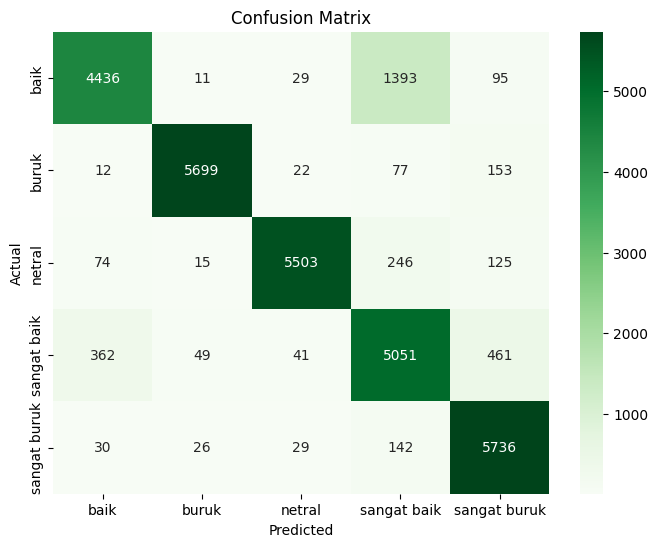

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print(df[['score', 'thumbsUpCount']].describe())


              score  thumbsUpCount
count  47629.000000   47629.000000
mean       3.764786       0.995423
std        1.734243      22.413220
min        1.000000       0.000000
25%        1.000000       0.000000
50%        5.000000       0.000000
75%        5.000000       0.000000
max        5.000000    2922.000000


In [ ]:
Q1 = df['thumbsUpCount'].quantile(0.25)
Q3 = df['thumbsUpCount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['thumbsUpCount'] < (Q1 - 1.5 * IQR)) | (df['thumbsUpCount'] > (Q3 + 1.5 * IQR))]
print(f"Jumlah outlier di thumbsUpCount: {len(outliers)}")


Jumlah outlier di thumbsUpCount: 6383


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter: hanya data yang BUKAN outlier
df_no_outlier = df[(df['thumbsUpCount'] >= lower_bound) & (df['thumbsUpCount'] <= upper_bound)].copy()

# Lihat hasilnya
print("Jumlah data setelah menghapus outlier:", len(df_no_outlier))

Jumlah data setelah menghapus outlier: 41246


In [ ]:
import pandas as pd
import numpy as np
import re
import string

# Bersihkan teks
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(rf"[{string.punctuation}]", '', text)
    return text

# Terapkan pada data tanpa outlier
df_no_outlier['content_clean'] = df_no_outlier['content'].apply(clean_text)

# Buang data yang masih kosong setelah cleaning
df_no_outlier = df_no_outlier.dropna(subset=['content_clean'])

# Label encoding untuk target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_no_outlier['sentiment'])


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf.fit_transform(df_no_outlier['content_clean'])


In [ ]:
from scipy.sparse import hstack, csr_matrix

# Transformasi log pada fitur numerik
df_no_outlier['thumbsUpCount_log'] = np.log1p(df_no_outlier['thumbsUpCount'])

# Gabungkan fitur numerik dengan TF-IDF
X_num = csr_matrix(df_no_outlier[['thumbsUpCount_log']].values)
X = hstack([X_text, X_num])


In [ ]:
from collections import Counter

print("Distribusi label sebelum SMOTE:", Counter(y))


Distribusi label sebelum SMOTE: Counter({np.int64(3): 28971, np.int64(4): 7647, np.int64(0): 2129, np.int64(2): 1292, np.int64(1): 1207})


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Cek distribusi label
print("Distribusi sebelum SMOTE:", Counter(y))

# SMOTE untuk menyeimbangkan kelas
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:", Counter(y_res))


Distribusi sebelum SMOTE: Counter({np.int64(3): 28971, np.int64(4): 7647, np.int64(0): 2129, np.int64(2): 1292, np.int64(1): 1207})
Distribusi setelah SMOTE: Counter({np.int64(3): 28971, np.int64(1): 28971, np.int64(2): 28971, np.int64(4): 28971, np.int64(0): 28971})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)



In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

        baik       0.90      0.73      0.80      5794
       buruk       0.98      0.96      0.97      5794
      netral       0.98      0.91      0.94      5794
 sangat baik       0.72      0.86      0.78      5795
sangat buruk       0.89      0.97      0.93      5794

    accuracy                           0.89     28971
   macro avg       0.89      0.89      0.89     28971
weighted avg       0.89      0.89      0.89     28971



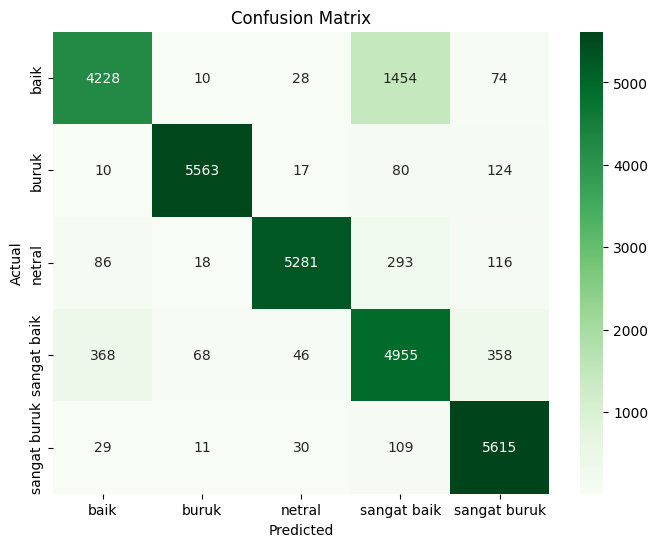

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()